In [2]:
import pandas as pd


In [3]:
df=pd.read_csv('car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape


(301, 9)

In [6]:
#fuel type , seller type ,transmission is my categorical feratures

In [7]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Fuel_Type'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']
[0 1 3]


In [8]:
#check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
df['Old']=2022-df['Year']

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [12]:
df.drop(['Car_Name'],axis=1)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Old'],
      dtype='object')

In [14]:
final_df=df[[ 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Old']]

In [15]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [16]:
#One hot encoding
final_df=pd.get_dummies(final_df,drop_first=True)

In [17]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [18]:
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

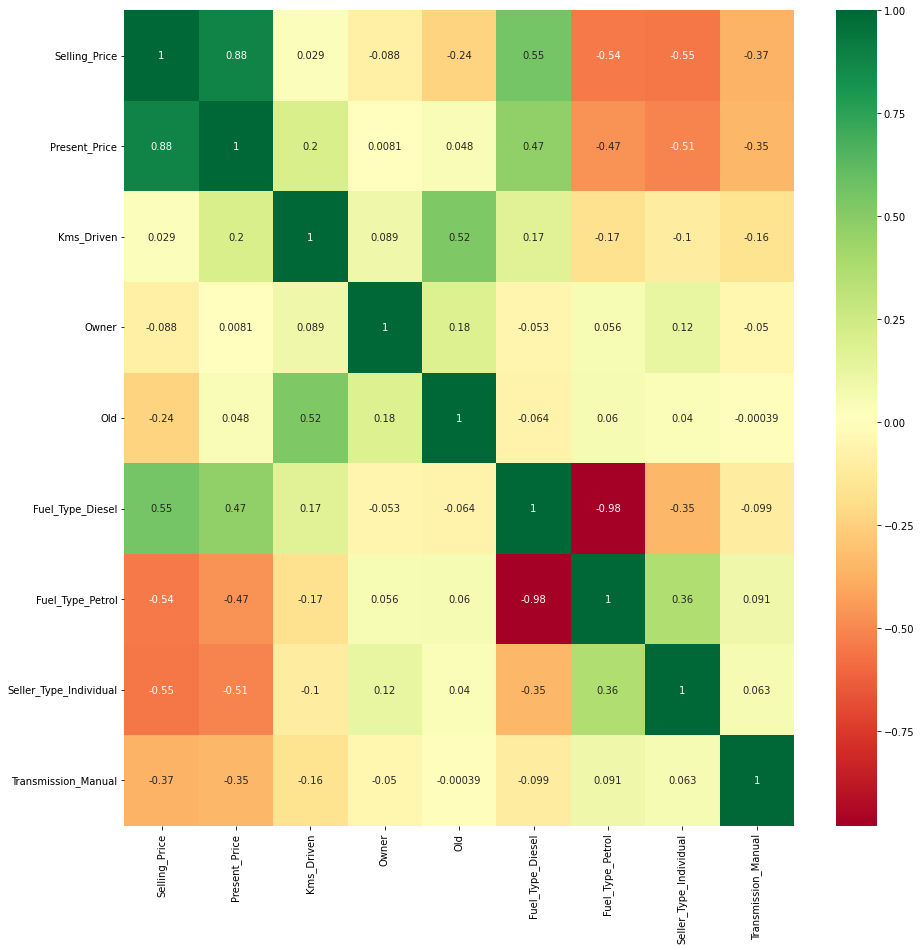

In [20]:
corr=final_df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='RdYlGn')#correlation using heatmap

In [21]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [22]:
x=final_df.iloc[:,1:]#independent features
y=final_df.iloc[:,0]#dependent features

In [23]:
x.head()

,Present_Price,Kms_Driven,Owner,Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [24]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [25]:
#features importance

from sklearn.ensemble import ExtraTreesRegressor


In [26]:
model1=ExtraTreesRegressor()
model1.fit(x,y)

ExtraTreesRegressor()

In [27]:
print(model1.feature_importances_)

[0.422139   0.04203979 0.00079561 0.07859556 0.19393285 0.01628347
 0.1242908  0.12192291]


In [28]:
features_imp=pd.Series([0.38548552, 0.04083149, 0.00077384 ,0.07462636 ,0.2243769,  0.00670081, 0.13039769, 0.13680739],index=x.columns)

In [29]:
features_imp

Present_Price             0.385486
Kms_Driven                0.040831
Owner                     0.000774
Old                       0.074626
Fuel_Type_Diesel          0.224377
Fuel_Type_Petrol          0.006701
Seller_Type_Individual    0.130398
Transmission_Manual       0.136807
dtype: float64

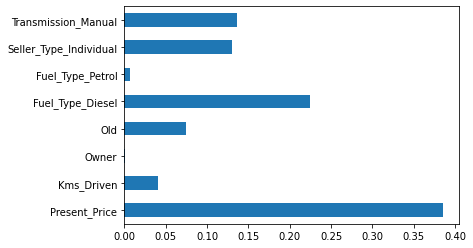

In [30]:
features_imp.plot(kind='barh')
plt.show()

In [31]:
## Present price is more important features in this model

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [34]:
x_train.shape

(240, 8)

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rf_reg=RandomForestRegressor(n_estimators=100)

In [37]:
#hyperparameters using
import numpy as np
n_estimators=[int(x)  for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [38]:
#Random forest search cv

#Numbe of decision tree in random forest
n_estimators=[int(x)  for x in np.linspace(start=100,stop=1200,num=12)]
#No of features consider in every split
max_features=['auto','sqrt']

#Maximum no of levels in a tree
max_depth=[int(x) for x in np.linspace(start=5, stop=30,num=6)]

#minimum number of sample require to split a node
min_samples_split=[2,5,10,15,100]
#minimum number of sample requirein each leaf node
min_samples_leaf=[1,2,5,10]

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
#Create random grid
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':
            min_samples_split,'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [41]:
rf=RandomForestRegressor()

In [42]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',random_state=42,n_iter=10,cv=5,verbose=2,n_jobs=1)

In [43]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s


c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s


c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s


c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s


c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s


c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.3s


c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.3s


c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.3s


c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.3s


c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.3s


c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.6s


c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.6s


c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.6s


c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.6s


c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   0.9s
[CV] END max_depth=5, max_feat

c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.6s


c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.6s


c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.6s


c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.6s


c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.6s


c:\Users\rjbik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [44]:
#verbose is used for displaying the result 
#n_jobs is used to use no. of core of cpu

In [80]:
x_test

,Present_Price,Kms_Driven,Owner,Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
10,3.60,2135,0,5,0,1,0,1
174,0.72,38600,0,7,0,1,1,1
47,4.15,65000,0,16,0,1,0,1
257,13.60,40324,0,7,0,1,0,1
117,1.90,14000,0,7,0,1,1,1
...,...,...,...,...,...,...,...,...
291,6.10,31427,0,7,0,1,0,1
120,1.26,5700,0,6,0,1,1,1
72,18.61,56001,0,9,0,1,0,1
108,1.50,18000,0,6,0,1,1,1


In [45]:
y_pred=rf_random.predict(x_test)

In [46]:
y_pred

array([ 2.54882701,  0.31786086,  2.6858245 ,  9.14109697,  1.17520137,
        4.94091693, 22.68275029,  9.19493439,  2.89691134,  5.28741552,
        5.74672987,  0.73280156,  9.74642246,  7.24393525,  5.78503793,
        5.51658721,  1.17164427, 22.6968868 ,  4.68050093,  1.17774645,
        2.8406826 ,  3.45000941,  0.46378867, 22.58023266,  9.67753039,
        5.5434381 ,  1.1706085 ,  3.3624605 ,  5.57845068,  0.5735577 ,
        9.35268448,  4.66878387,  3.92513162,  0.42796748,  0.35229171,
        0.43230149,  5.46195343,  2.90280628,  1.16126808,  0.64032242,
        0.62964899,  0.36883605,  4.42524094,  9.22401157, 22.58023266,
        7.99917581,  2.79238834,  0.22257995,  4.92041148,  0.23017532,
        1.15927522,  4.50048472,  9.87697108,  7.29953566,  1.21270372,
        0.43230149,  4.63466776,  0.86960985,  6.93525271,  1.16236001,
       10.66564102])

C:\Users\rjbik\AppData\Local\Temp\ipykernel_17132\520176394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

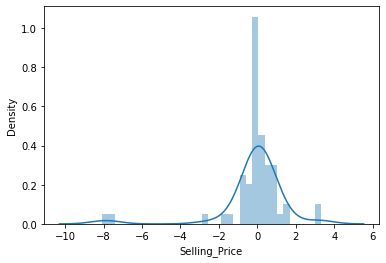

In [47]:
sns.distplot(y_test-y_pred)

In [48]:
import matplotlib.pyplot as plt


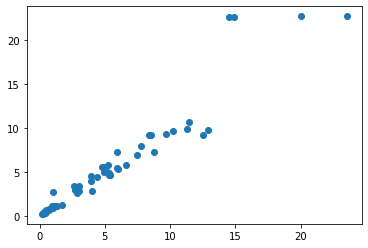

In [49]:
plt.scatter(y_test,y_pred)

In [50]:
import pickle
#open your file where you want to store the data
file=open('random_forest_reggors_model.pkl','wb')
#Dump the information 
pickle.dump(rf_random,file)

In [66]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [70]:
df.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [69]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [58]:
final_df.tail()

,Selling_Price,Present_Price,Kms_Driven,Owner,Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
296,9.50,11.6,33988,0,6,1,0,0,1
297,4.00,5.9,60000,0,7,0,1,0,1
298,3.35,11.0,87934,0,13,0,1,0,1
299,11.50,12.5,9000,0,5,1,0,0,1
300,5.30,5.9,5464,0,6,0,1,0,1


In [55]:
x_train.head(2)

,Present_Price,Kms_Driven,Owner,Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
267,9.40,19434,0,6,1,0,0,1
95,18.61,72000,0,10,0,1,0,1


In [76]:
x_train.Owner.unique()

array([0, 1, 3], dtype=int64)

In [67]:
x_train.Transmission_Manual.unique()

array([1, 0], dtype=uint8)

In [97]:
def car_pred():
    present_price=float(input("Enter the Present Price of the car"))
    km_driven=int(input("enter the km driven"))
    owner=int(input("Enter the owner of the cars 0,1,3"))
    old_year=int(input("Enter the Vintage of Vehicle"))
    
    fuel_type=input("Enter the fuel type Petrol/Deisel/Cng")
    fuel_type=fuel_type.lower()

    
    if fuel_type=='petrol':
        deisel=0
        petrol=1 
    elif fuel_type=='deisel':
        deisel=1
        petrol=0
        
    else:
        petrol=0
        deisel=0
    seller_type=input("Enter the seller type Dealer=d/individual=i")
    seller_type=seller_type.lower()
    if seller_type=='i':
        seller_typ=1
    else:
        seller_typ=0
    trans_type=input("enter the Transmission type m/a")
    if trans_type=='a':
        trans_typ=0
    else:
        trans_typ=1
    #(present_price,km_driven,owner,old_year,deisel,petrol,seller_typ,trans_typ)
    user_df=pd.DataFrame({'Present_Price':[present_price],	'Kms_Driven':[km_driven],'Owner':[owner],	'Old':[old_year],
    'Fuel_Type_Diesel':[deisel]	,'Fuel_Type_Petrol':[petrol]  , 'Seller_Type_Individual':[seller_typ],	'Transmission_Manual':[trans_typ]})
    return user_df
        











    

In [95]:
import pickle
#open your file where you want to store the data
pickle.dump(rf_random,open('random_forest.pkl','wb'))
pickled_model=pickle.load(open('random_forest.pkl','rb'))

In [98]:
##Prediction 
pickled_model.predict(car_pred())


array([3.48054607])

array([2.91765185])